In [1]:
import io
import sys
import pdfminer
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfparser import PDFParser
from pdfminer.converter import XMLConverter, HTMLConverter, TextConverter
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LAParams, LTTextBox, LTTextLine
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

In [2]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)


In [3]:
import spacy
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.graph_objs import FigureWidget
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
from collections import Counter
import scattertext as st
import spacy
from pprint import pprint

Loading BokehJS ...

In [70]:
from wordcloud import WordCloud, STOPWORDS 


In [4]:
from spacy.lang.en import English
import en_core_web_sm



ModuleNotFoundError: No module named 'en_core_web_sm'

In [5]:
def convert(filename):
    fp = open(filename, 'rb')
    rsrcmgr = PDFResourceManager()
    retstr = io.StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    # Create a PDF interpreter object.
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    # Process each page contained in the document.

    for page in PDFPage.get_pages(fp):
        interpreter.process_page(page)
        data =  retstr.getvalue()

    return data

In [6]:
#data=convert('t.pdf')
import os

In [7]:
#converts all pdfs in directory pdfDir, saves all resulting txt files to txtdir
def convertMultiple(pdfDir, txtDir):
    if pdfDir == "": pdfDir = os.getcwd() + "\\" #if no pdfDir passed in 
    for pdf in os.listdir(pdfDir): #iterate through pdfs in pdf directory
        fileExtension = pdf.split(".")[-1]
        fileName=pdf.split(".")[0]
        if fileExtension == "pdf":
            pdfFilename = pdfDir + pdf 
            text = convert(pdfFilename) #get string of text content of pdf
            textFilename = txtDir + fileName  + ".txt"
            textFile = open(textFilename, "w",encoding='utf8') #make text file
            textFile.write(text) #write text to text file
            textFile.close()

pdfDir = "C:/Users/v9022828/Documents/Projects/Learn/TextAnalytics/Text/dataf/"
txtDir = "C:/Users/v9022828/Documents/Projects/Learn/TextAnalytics/Text/datat/"
resDir = "C:/Users/v9022828/Documents/Projects/Learn/TextAnalytics/Text/results/"

convertMultiple(pdfDir, txtDir)

In [141]:
df = pd.DataFrame()
df_c = pd.DataFrame()

c=0
for file in os.listdir(txtDir):
    textFilename = txtDir + file
    print(textFilename)
    fileExtension = file.split(".")[-1]
    if fileExtension == "txt":
        data = pd.read_csv(textFilename,sep="/n", header = None)  
        df=df.append(data)
        df_c = pd.concat([df_c, data], ignore_index=True,axis=1)
    c=c+1
    

C:/Users/v9022828/Documents/Projects/Learn/TextAnalytics/Text/datat/Deep_AR_AWS_Sagemaker.txt
C:/Users/v9022828/Documents/Projects/Learn/TextAnalytics/Text/datat/patent.txt
C:/Users/v9022828/Documents/Projects/Learn/TextAnalytics/Text/datat/t.txt


In [143]:
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""
df_c.tail()
#print(df_c.head())

,0,1,2
2237,NaN,"Second Day of October, 2001",NaN
2238,NaN,7.14 face,NaN
2239,NaN,Attesting Officer,NaN
2240,NaN,Acting Director of the United States Patent an...,NaN
2241,NaN,NICHOLAS P. GODCI,NaN


In [129]:
#df_s = df_c[[2]].copy()
#df_s = df_s.apply(lambda x: x.lower())
df_c.dropna(inplace=True)

In [140]:
#df_s.columns=['text']
#print(df_s.tail())
df_c[2].shape

(904,)

# Removing numbers and non ascii words

In [38]:
df_s2 = df_s['text'].str.replace('\d+', '')

In [39]:
def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i)<128)
 
df_s3 = df_s2.apply(remove_non_ascii)

In [40]:
df_s3.tail()

1695         Computer Vision and Pattern Recognition, , .
1696    [] Y. Yan, M. Chen, M.-L. Shyu, S.-C. Chen, De...
1697                          Multimedia (ISM), IEEE, , .
1698                               View publication stats
1699                               View publication stats
Name: text, dtype: object

Read multiple pdf files

# Top bigrams after removing stop words

In [41]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df_s3, 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

cid cid 116
fault diagnosis 96
et al 90
deep learning 78
machine health 56
health monitoring 56
neural network 53
signal processing 37
neural networks 37
time series 37
bearing fault 31
convolutional neural 30
systems signal 28
zhao et 28
mechanical systems 26
auto encoder 26
ieee trans 26
deep belief 25
dl based 24
al mechanical 24


In [54]:
#fig = plt.figure()
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')
#fig.savefig()

## Saving fugures

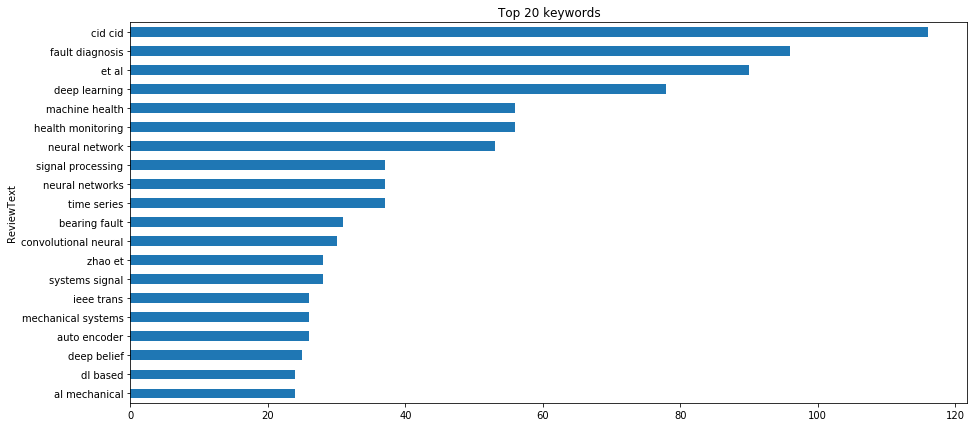

In [69]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=True).plot.barh(ax=ax,title='Top 20 keywords')
plt.show()
fig.savefig('results/Journal.png')

In [94]:
df4.head()

,ReviewText,count
0,cid cid,116
1,fault diagnosis,96
2,et al,90
3,deep learning,78
4,machine health,56


In [128]:
#data=df_4
for file in os.listdir(txtDir):
    fileName=file.split(".")[0]
    textFilename = txtDir + file
    resFilename =  resDir + fileName + ".png"
    text = open(textFilename,encoding='utf8').read()
    wordcloud = WordCloud().generate(text)
    wordcloud.to_file(resFilename)


# Top unigrams after removing stop words


In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_s3, 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

In [ ]:
submission = pd.DataFrame({"Keywords":df2['ReviewText'], "Count":df2['count']})
submission.to_csv("keywords.csv", index=False)

In [ ]:
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(min_df=.0025, max_df=.1, stop_words='english', ngram_range=(1,2))
tvec_weights = tvec.fit_transform(df_s3.stemmed.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

# Top trigrams after removing stop words


In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

In [ ]:
df6.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words')

# Top 20 part-of-speech tagging of review corpus


In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
from textblob import TextBlob

In [ ]:
blob = TextBlob(str(df['text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for review corpus')

# Topic Modeling with LSA (Latent Semantic Analysis)
#https://medium.com/nanonets/topic-modeling-with-lsa-psla-lda-and-lda2vec-555ff65b0b05

In [ ]:
reindexed_data = df_s
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)

In [ ]:
n_topics = 6
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [ ]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [ ]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [ ]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [ ]:
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

In [ ]:

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of review text');
ax.set_title('LSA topic counts');
plt.show();

# Text Summarization

In [ ]:
from gensim.summarization.summarizer import summarize


In [ ]:
extracted_text

In [ ]:
print(summarize(extracted_text))

## Word cloud